In [1]:
!pip install ultralytics==8.3.191

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.9 MB/s eta 0:00:00


In [2]:
# optional
!wget -O dataset.zip "https://github.com/jscfping/HtmlImgLabelizer/raw/refs/heads/main/yolo_examples/dataset.zip"
!unzip dataset.zip -d .

--2025-09-09 07:36:19--  https://github.com/jscfping/HtmlImgLabelizer/raw/refs/heads/main/yolo_examples/dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jscfping/HtmlImgLabelizer/refs/heads/main/yolo_examples/dataset.zip [following]
--2025-09-09 07:36:20--  https://raw.githubusercontent.com/jscfping/HtmlImgLabelizer/refs/heads/main/yolo_examples/dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9826091 (9.4M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   9.37M  --.-KB/s    in 0.08s   

2025-09-09 07:36:21 (120 MB/s) - ‘dataset.z

In [3]:
from ultralytics import YOLO
from IPython.display import display
from PIL import Image
from datetime import datetime
import torch
import cv2

print(torch.version.cuda)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Current device:", torch.cuda.current_device())
    print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

colors = [
    (255, 0, 0),
    (255, 165, 0),
    (255, 255, 0),
    (0, 255, 0),
    (0, 0, 255),
    (75, 0, 130),
    (128, 0, 128),
    (255, 192, 203),
    (165, 42, 42),
    (0, 255, 255),
    (128, 128, 128)
]


def show_pred(model, img_path, conf=0.1):
    original_img = cv2.imread(img_path)
    original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    results = model.predict(source=img_path, conf=conf)
    result = results[0]

    class_names = model.names

    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        class_id = int(box.cls[0])
        confidence = float(box.conf[0])

        color = colors[class_id % len(colors)]

        cv2.rectangle(original_img_rgb, (x1, y1), (x2, y2), color, 2)

        label = f"{class_names[class_id]}: {confidence:.2f}"

        (text_width, text_height), baseline = cv2.getTextSize(
            label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1
        )

        cv2.rectangle(
            original_img_rgb,
            (x1, y1 - text_height - 5),
            (x1 + text_width, y1),
            color,
            -1
        )

        cv2.putText(
            original_img_rgb,
            label,
            (x1, y1 - 5),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (255, 255, 255),
            1
        )

    # display(Image.open("dataset/03.png"))
    display(Image.fromarray(original_img_rgb))

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
12.6
CUDA available: True
CUDA device count: 1
Current device: 0
Device name: Tesla T4



image 1/1 /content/dataset/19.png: 640x576 1 apple, 96.4ms
Speed: 19.3ms preprocess, 96.4ms inference, 340.3ms postprocess per image at shape (1, 3, 640, 576)


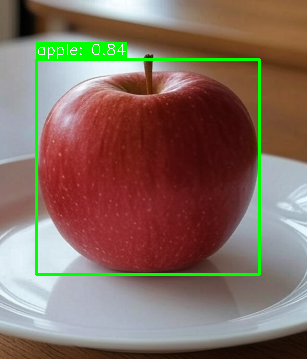

In [4]:
yolo11n = YOLO("yolo11n.pt")

show_pred(yolo11n, "dataset/19.png", 0.5)

In [5]:
yolo11n.train(
    data="dataset/dataset.yaml",
    epochs=40,
    imgsz=640,
    batch=16
)

new_model_name = f"{datetime.now().strftime('%Y%m%d_%H%M%S')}.pt"

yolo11n.save(new_model_name)

New https://pypi.org/project/ultralytics/8.3.196 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optim


image 1/1 /content/dataset/19.png: 640x576 1 apple, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 576)


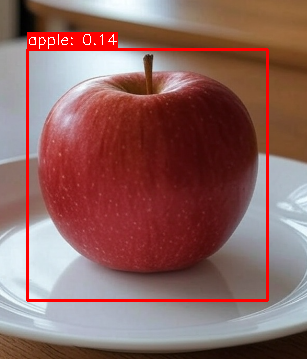


image 1/1 /content/dataset/27.png: 640x640 1 apple, 1 banana, 12.9ms
Speed: 3.9ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


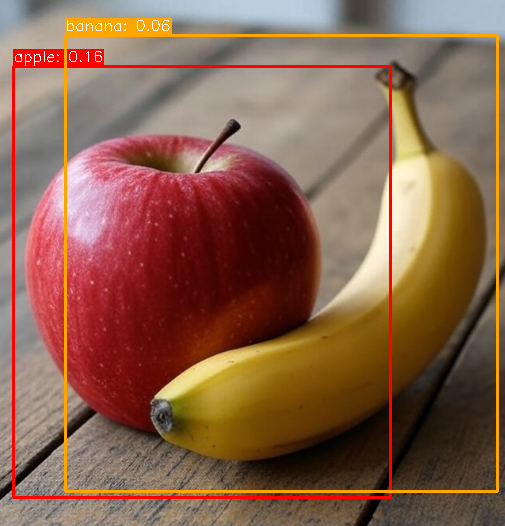


image 1/1 /content/dataset/38.png: 640x576 1 banana, 11.0ms
Speed: 3.3ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


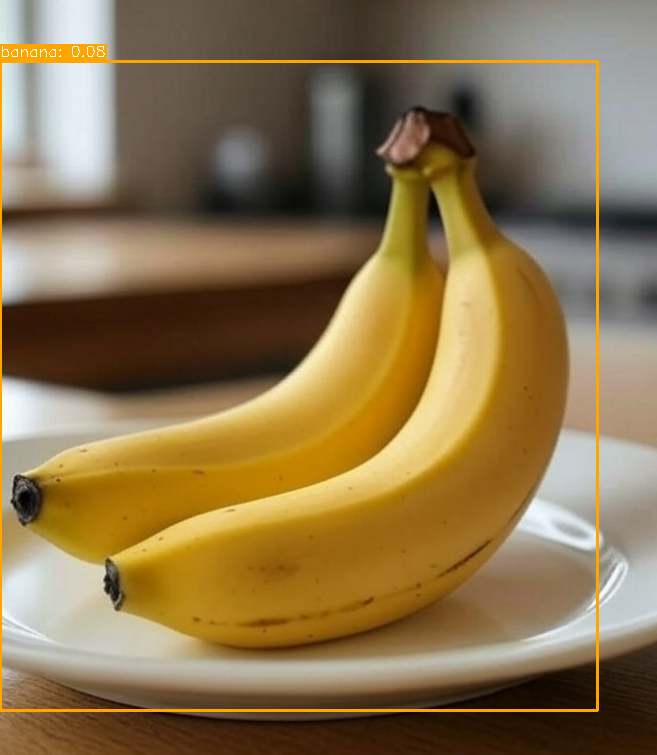

In [6]:
new_model = YOLO(new_model_name)
show_pred(new_model, "dataset/19.png", 0.03)
show_pred(new_model, "dataset/27.png", 0.03)
show_pred(new_model, "dataset/38.png", 0.03)